In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [12]:
c = cast[(cast.character == "Batman") | (cast.character =="Superman")]
c.pop('name')
c.pop('type')
c.pop('n')
c.head()

,title,year,character
928,Batman Fights Dracula,1967,Batman
14696,Batman v Superman: Dawn of Justice,2016,Batman
14722,Justice League Part Two,2019,Batman
14738,Suicide Squad,2016,Batman
14744,The Justice League Part One,2017,Batman


In [24]:
a = c.groupby(['year','character']).size().unstack().fillna(0)
a['Superman_Year'] = a['Superman'] > a['Batman']
a.Superman_Year.value_counts()
a["Batman_Year"] = a.Batman > a.Superman
#acc =0
#for i in a.Superman_Year:
#    if i:
#        acc += 1
#print(acc)
a["Superman_Year"].value_counts()


False    35
True     12
dtype: int64

12 years are Superman Years

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [25]:
df = cast[(cast.character == "Batman") | (cast.character=="Superman")].groupby(["year","character"]).size().unstack().fillna(0)
df["Batman_Year"] = df['Superman']<df['Batman']
df.Batman_Year.value_counts()


True     24
False    23
dtype: int64

24 years are batman years. (There are 11 years that are neither Batman nor Superman years)

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

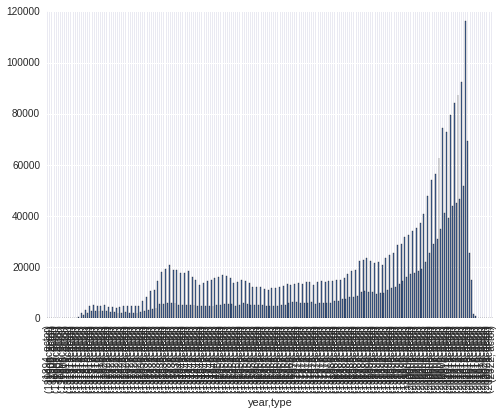

In [26]:
cast.groupby(["year","type"]).size().plot(kind="bar")

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

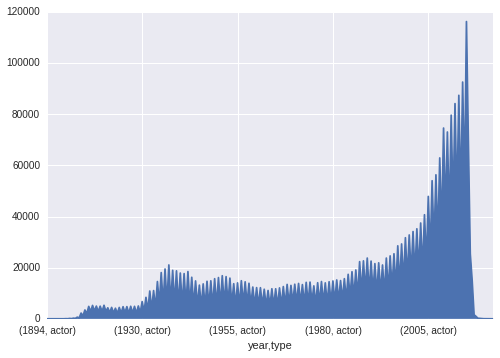

In [27]:
cast.groupby(["year","type"]).size().plot(kind="area")

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

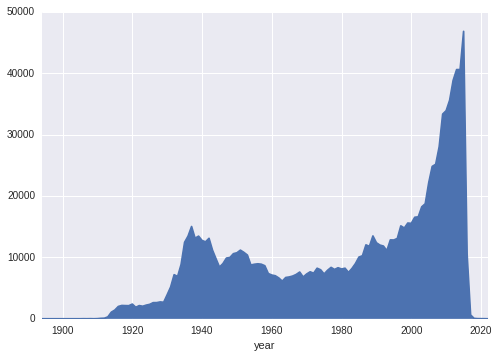

In [34]:
df =cast.groupby(["year","type"]).size().unstack().fillna(0)
df["diff"]=df.actor-df.actress
df["diff"].plot(kind="area")

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

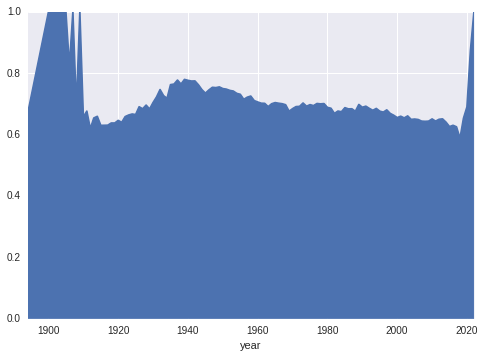

In [36]:
df =cast.groupby(["year","type"]).size().unstack().fillna(0)
df["frac"]=df.actor/(df.actor+df.actress)
df["frac"].plot(kind="area")

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

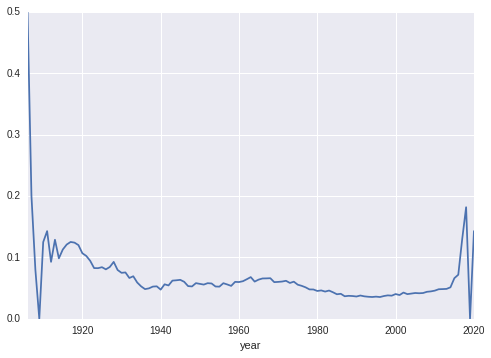

In [55]:
df = pd.DataFrame(cast[(cast.type=="actor")].groupby(["year","n"]).size()).unstack().fillna(0)
df["frac"]=df[0][2.0]/df[0].sum(axis=1)
df['frac'].plot(kind="line")

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

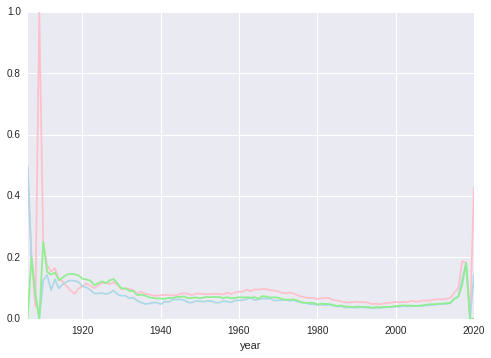

In [9]:
df = pd.DataFrame(cast[(cast.type=="actor")].groupby(["year","n"]).size()).unstack().fillna(0)
df["frac"]=df[0][1.0]/df[0].sum(axis=1)
df['frac'].plot(kind="line", color="pink")

df1 = pd.DataFrame(cast[(cast.type=="actor")].groupby(["year","n"]).size()).unstack().fillna(0)
df1["frac"]=df1[0][2.0]/df1[0].sum(axis=1)
df1['frac'].plot(kind="line",color="lightblue")

df2 = pd.DataFrame(cast[(cast.type=="actor")].groupby(["year","n"]).size()).unstack().fillna(0)
df2["frac"]=df2[0][3.0]/df2[0].sum(axis=1)
df2['frac'].plot(kind="line",color="lightgreen")
#[df["frac"],df1["frac"],df2["frac"]].plot(kind="line")